# Importing Libraries

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
sns.set()
%matplotlib inline 
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Taking Input data

In [66]:
data=pd.read_csv('Data/train.csv')

# Exploratory Data Analysis

In [67]:
data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [68]:
data.shape

(8693, 14)

In [69]:
data.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


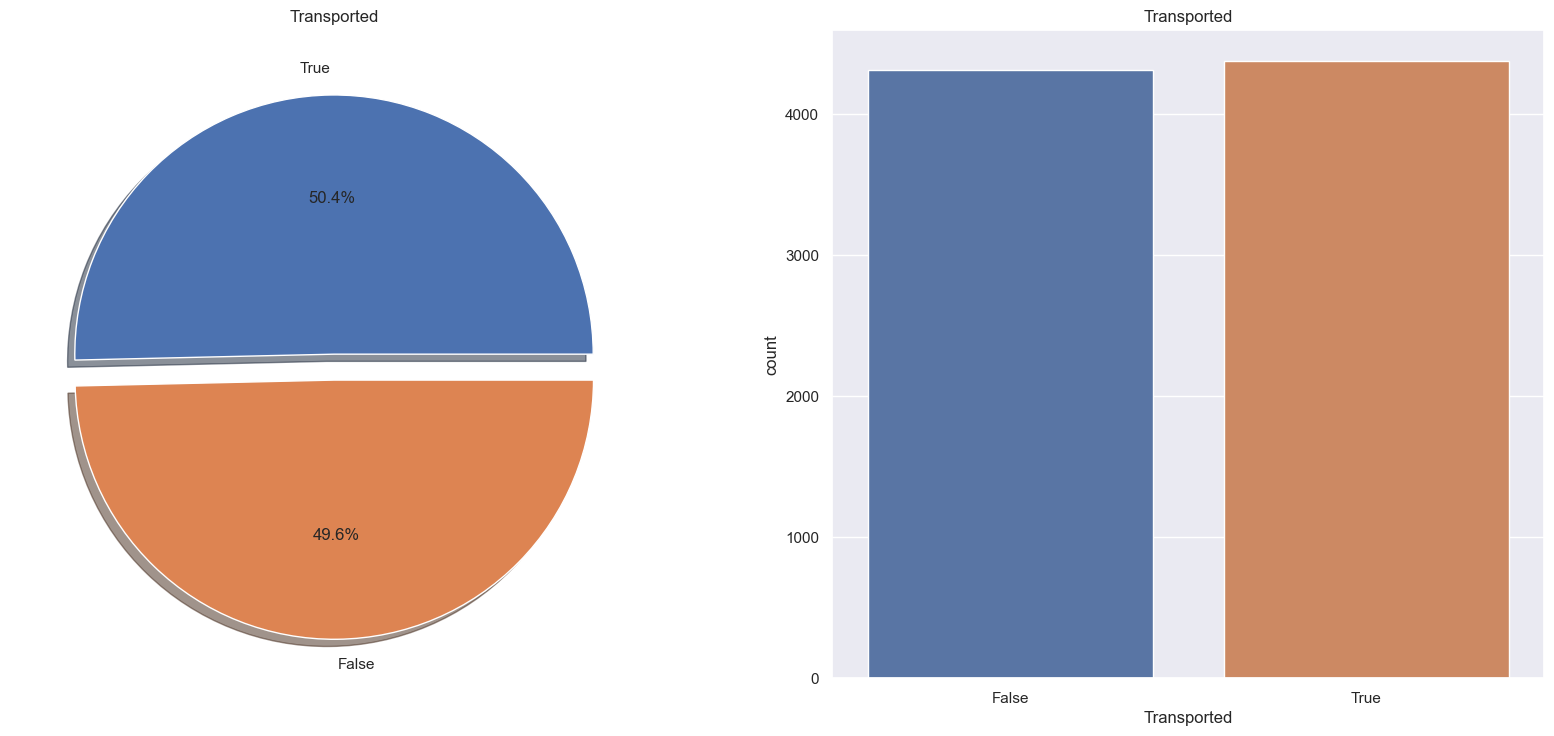

In [71]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Transported'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Transported')
ax[0].set_ylabel('')
sns.countplot(x='Transported',data=data,ax=ax[1])
ax[1].set_title('Transported')
plt.show()

In [72]:
def bar_plot(column):
    transported=data[data["Transported"] ==1][column].value_counts()
    not_transported=data[data["Transported"] ==0][column].value_counts()
    
    df=pd.DataFrame([transported,not_transported])
    df.index=['transported','not_transported']
    df.plot(kind='bar')

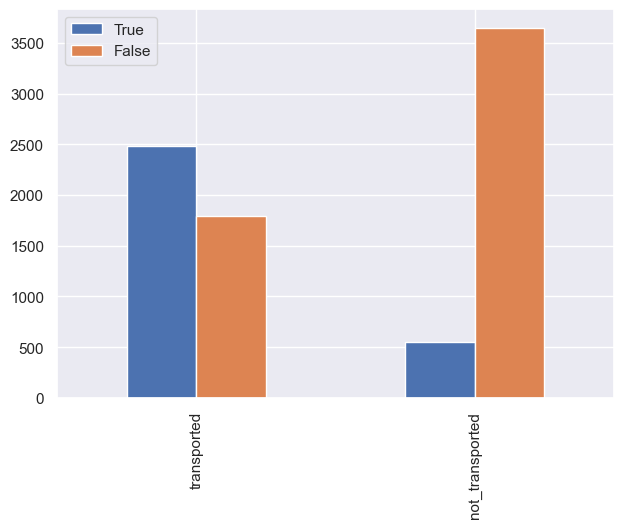

In [73]:
bar_plot('CryoSleep')

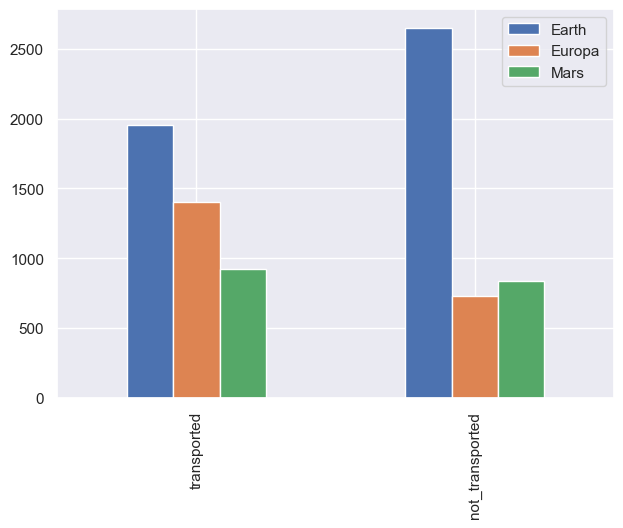

In [74]:
bar_plot('HomePlanet')

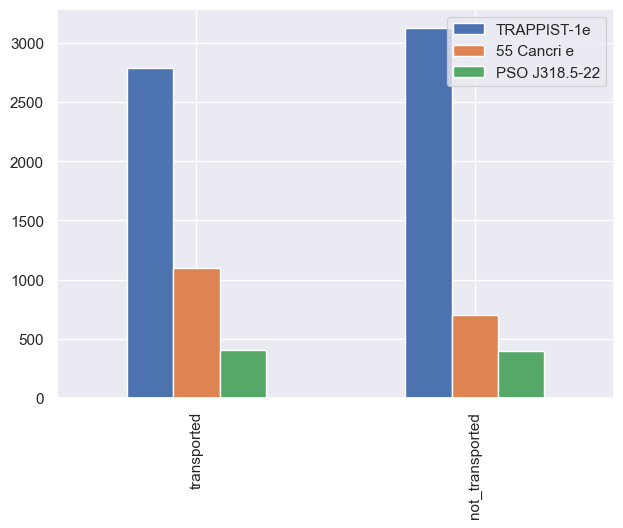

In [75]:
bar_plot('Destination')

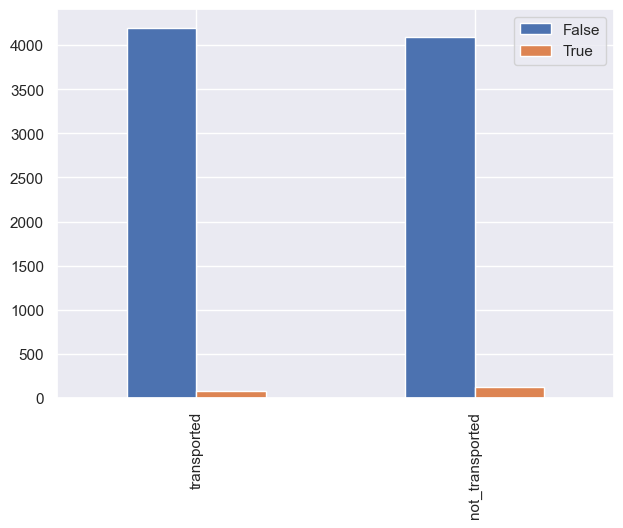

In [76]:
bar_plot('VIP')

In [77]:
data.groupby(['HomePlanet','Transported'])['Transported'].count()

HomePlanet  Transported
Earth       False          2651
            True           1951
Europa      False           727
            True           1404
Mars        False           839
            True            920
Name: Transported, dtype: int64

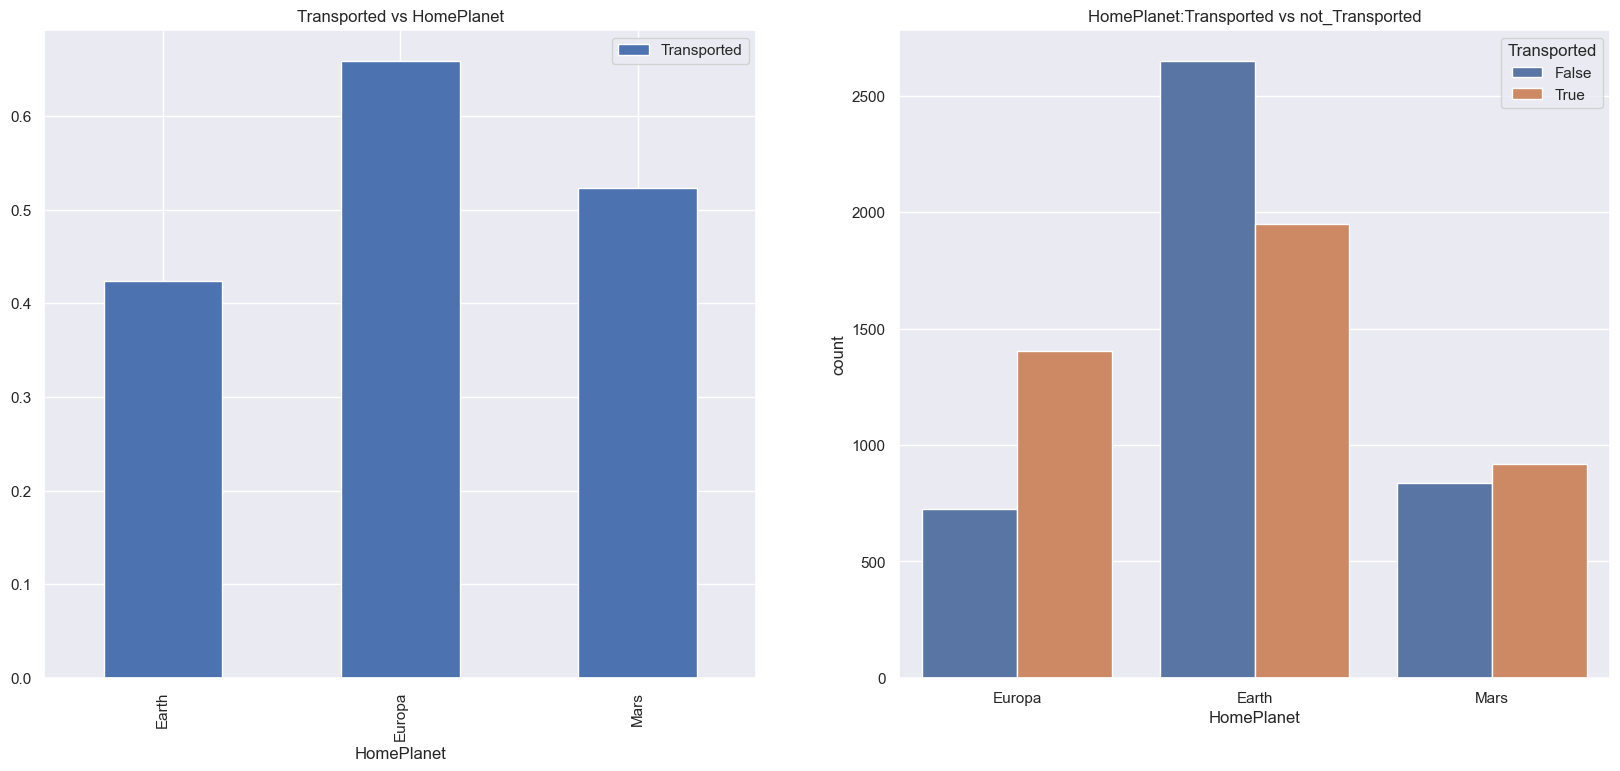

In [78]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data[['HomePlanet','Transported']].groupby(['HomePlanet']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Transported vs HomePlanet')
sns.countplot(x='HomePlanet',hue='Transported',data=data,ax=ax[1])
ax[1].set_title('HomePlanet:Transported vs not_Transported')
plt.show()

In [79]:
data.groupby(['VIP','Transported'])['Transported'].count()

VIP    Transported
False  False          4093
       True           4198
True   False           123
       True             76
Name: Transported, dtype: int64

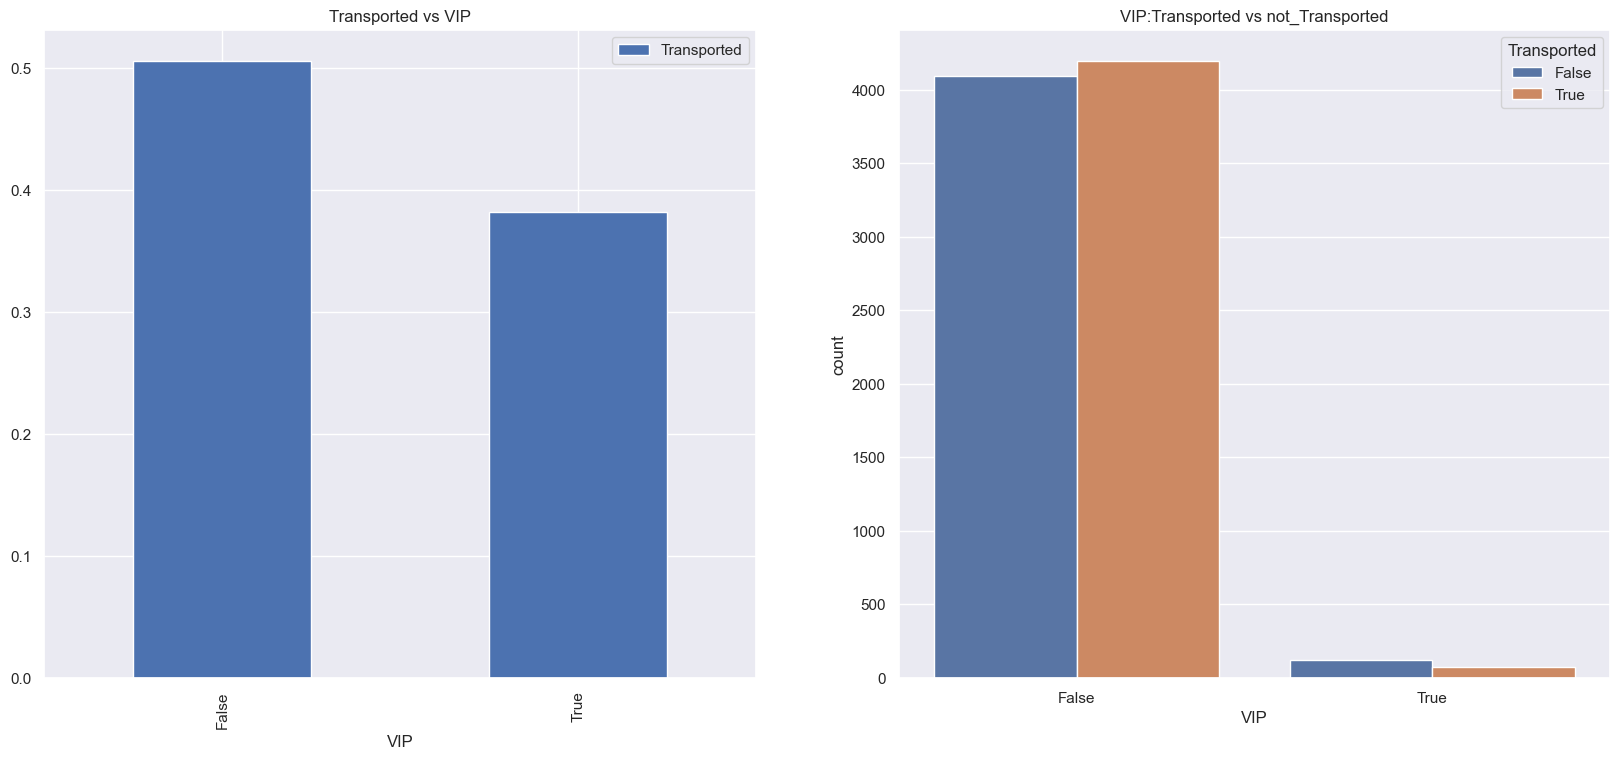

In [80]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data[['VIP','Transported']].groupby(['VIP']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Transported vs VIP')
sns.countplot(x='VIP',hue='Transported',data=data,ax=ax[1])
ax[1].set_title('VIP:Transported vs not_Transported')
plt.show()

In [81]:
pd.crosstab(data.Destination,data.Transported,margins=True).style.background_gradient(cmap='summer_r')

Transported,False,True,All
Destination,,,
55 Cancri e,702,1098,1800
PSO J318.5-22,395,401,796
TRAPPIST-1e,3128,2787,5915
All,4225,4286,8511


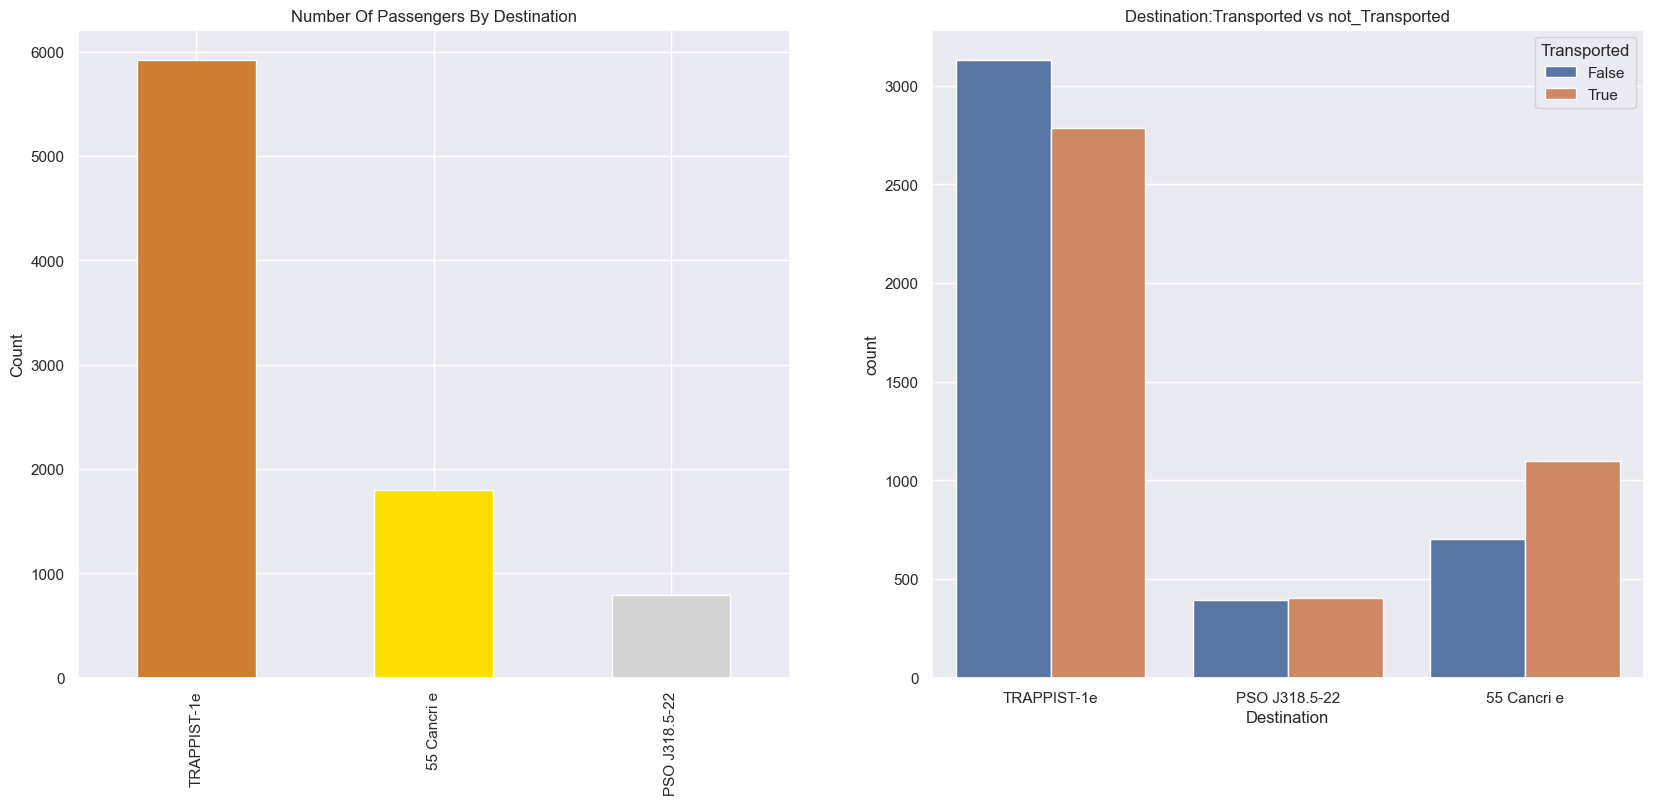

In [82]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Destination'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of Passengers By Destination')
ax[0].set_ylabel('Count')
sns.countplot(x='Destination',hue='Transported',data=data,ax=ax[1])
ax[1].set_title('Destination:Transported vs not_Transported')
plt.show()

In [83]:
pd.crosstab(data.HomePlanet,data.Transported,margins=True).style.background_gradient(cmap='summer_r')

Transported,False,True,All
HomePlanet,,,
Earth,2651,1951,4602
Europa,727,1404,2131
Mars,839,920,1759
All,4217,4275,8492


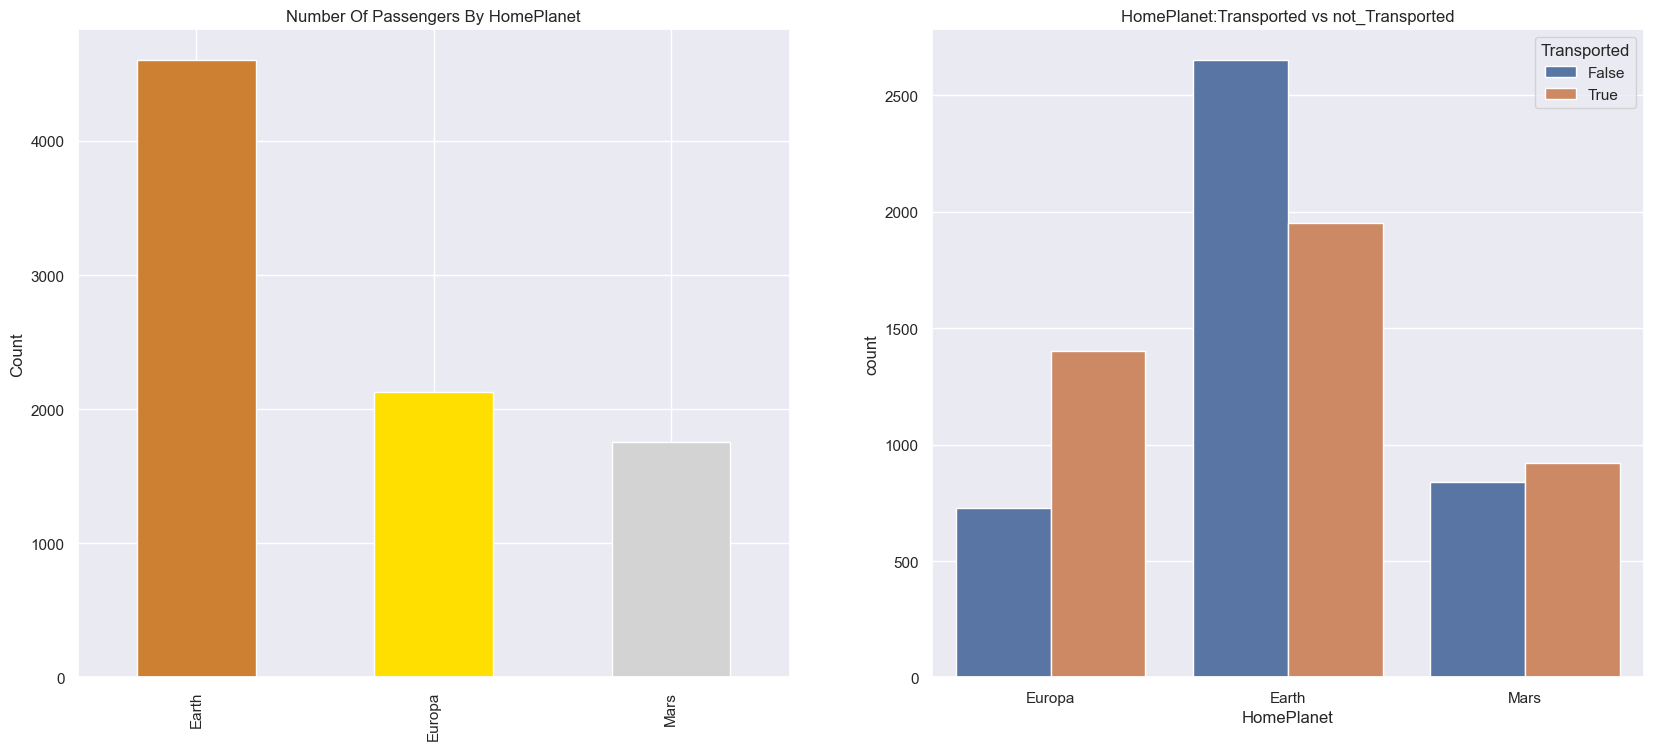

In [84]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['HomePlanet'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of Passengers By HomePlanet')
ax[0].set_ylabel('Count')
sns.countplot(x='HomePlanet',hue='Transported',data=data,ax=ax[1])
ax[1].set_title('HomePlanet:Transported vs not_Transported')
plt.show()

In [85]:
pd.crosstab(data.VIP,data.Transported,margins=True).style.background_gradient(cmap='summer_r')

Transported,False,True,All
VIP,,,
False,4093,4198,8291
True,123,76,199
All,4216,4274,8490


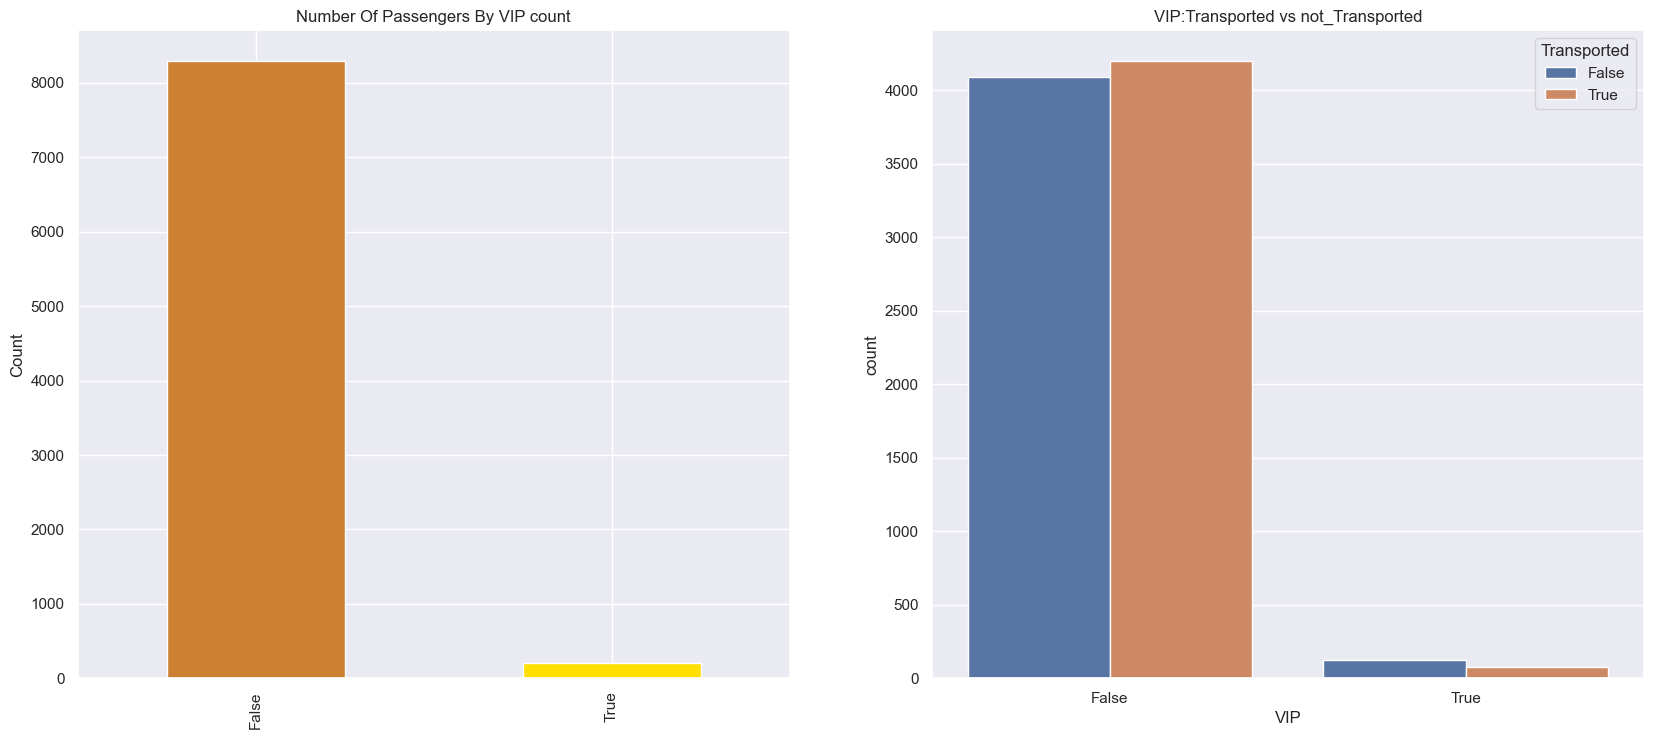

In [86]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['VIP'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of Passengers By VIP count')
ax[0].set_ylabel('Count')
sns.countplot(x='VIP',hue='Transported',data=data,ax=ax[1])
ax[1].set_title('VIP:Transported vs not_Transported')
plt.show()

In [87]:
pd.crosstab([data.CryoSleep,data.Transported],data.HomePlanet,margins=True).style.background_gradient(cmap='summer_r')

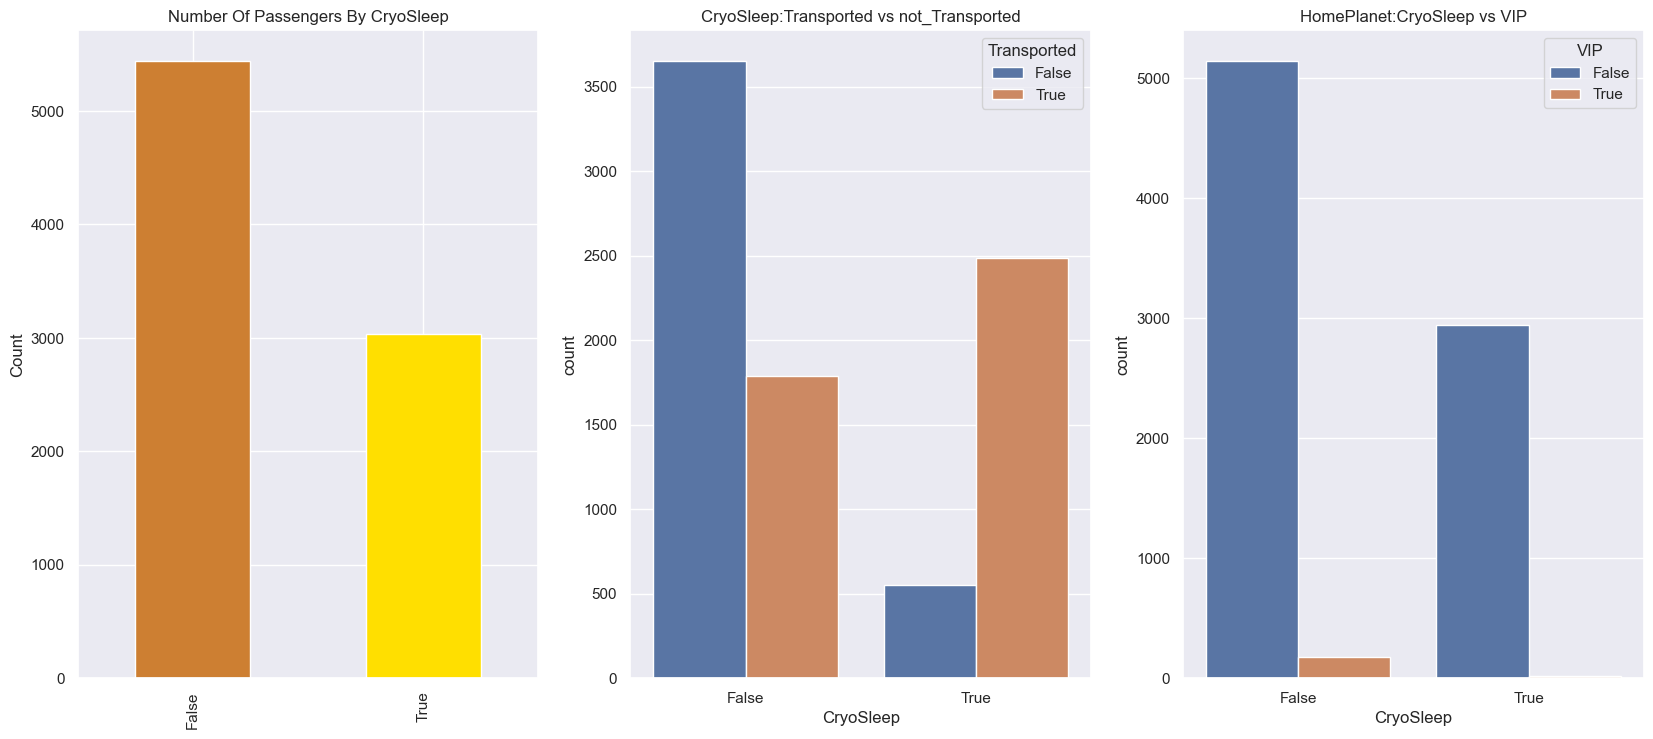

In [88]:
f,ax=plt.subplots(1,3,figsize=(18,8))
data['CryoSleep'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of Passengers By CryoSleep')
ax[0].set_ylabel('Count')
sns.countplot(x='CryoSleep',hue='Transported',data=data,ax=ax[1])
ax[1].set_title('CryoSleep:Transported vs not_Transported')
sns.countplot(x='CryoSleep',hue='VIP',data=data,ax=ax[2])
ax[2].set_title('HomePlanet:CryoSleep vs VIP')
plt.show()

In [89]:
print('Oldest:',data['Age'].max(),'Years')
print('Youngest:',data['Age'].min(),'Years')
print('Average:',data['Age'].mean(),'Years')

Oldest: 79.0 Years
Youngest: 0.0 Years
Average: 28.82793046746535 Years


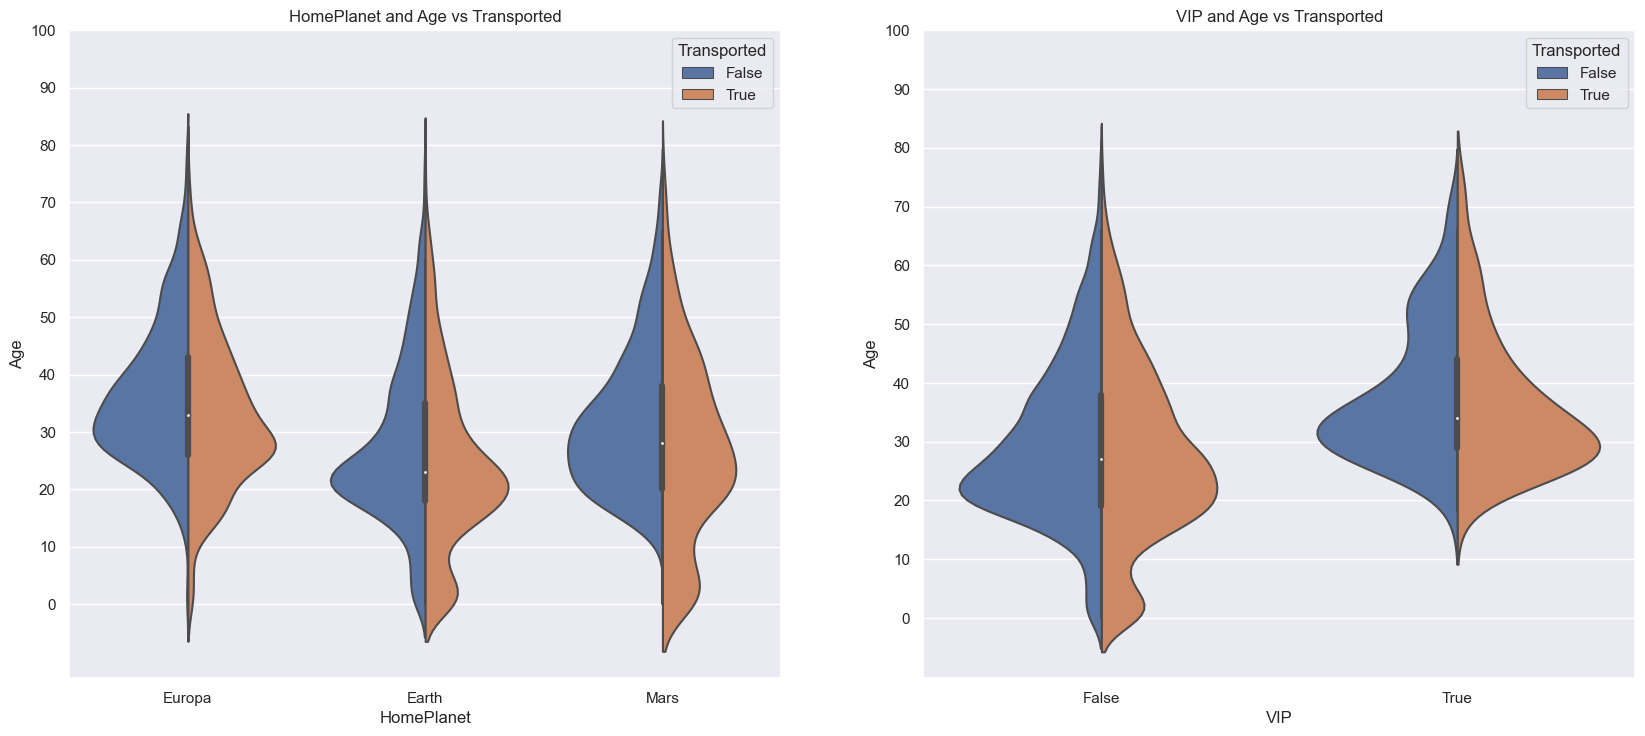

In [90]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot(x="HomePlanet",y="Age", hue="Transported", data=data,split=True,ax=ax[0])
ax[0].set_title('HomePlanet and Age vs Transported')
ax[0].set_yticks(range(0,110,10))
sns.violinplot(x="VIP",y="Age", hue="Transported", data=data,split=True,ax=ax[1])
ax[1].set_title('VIP and Age vs Transported')
ax[1].set_yticks(range(0,110,10))
plt.show()

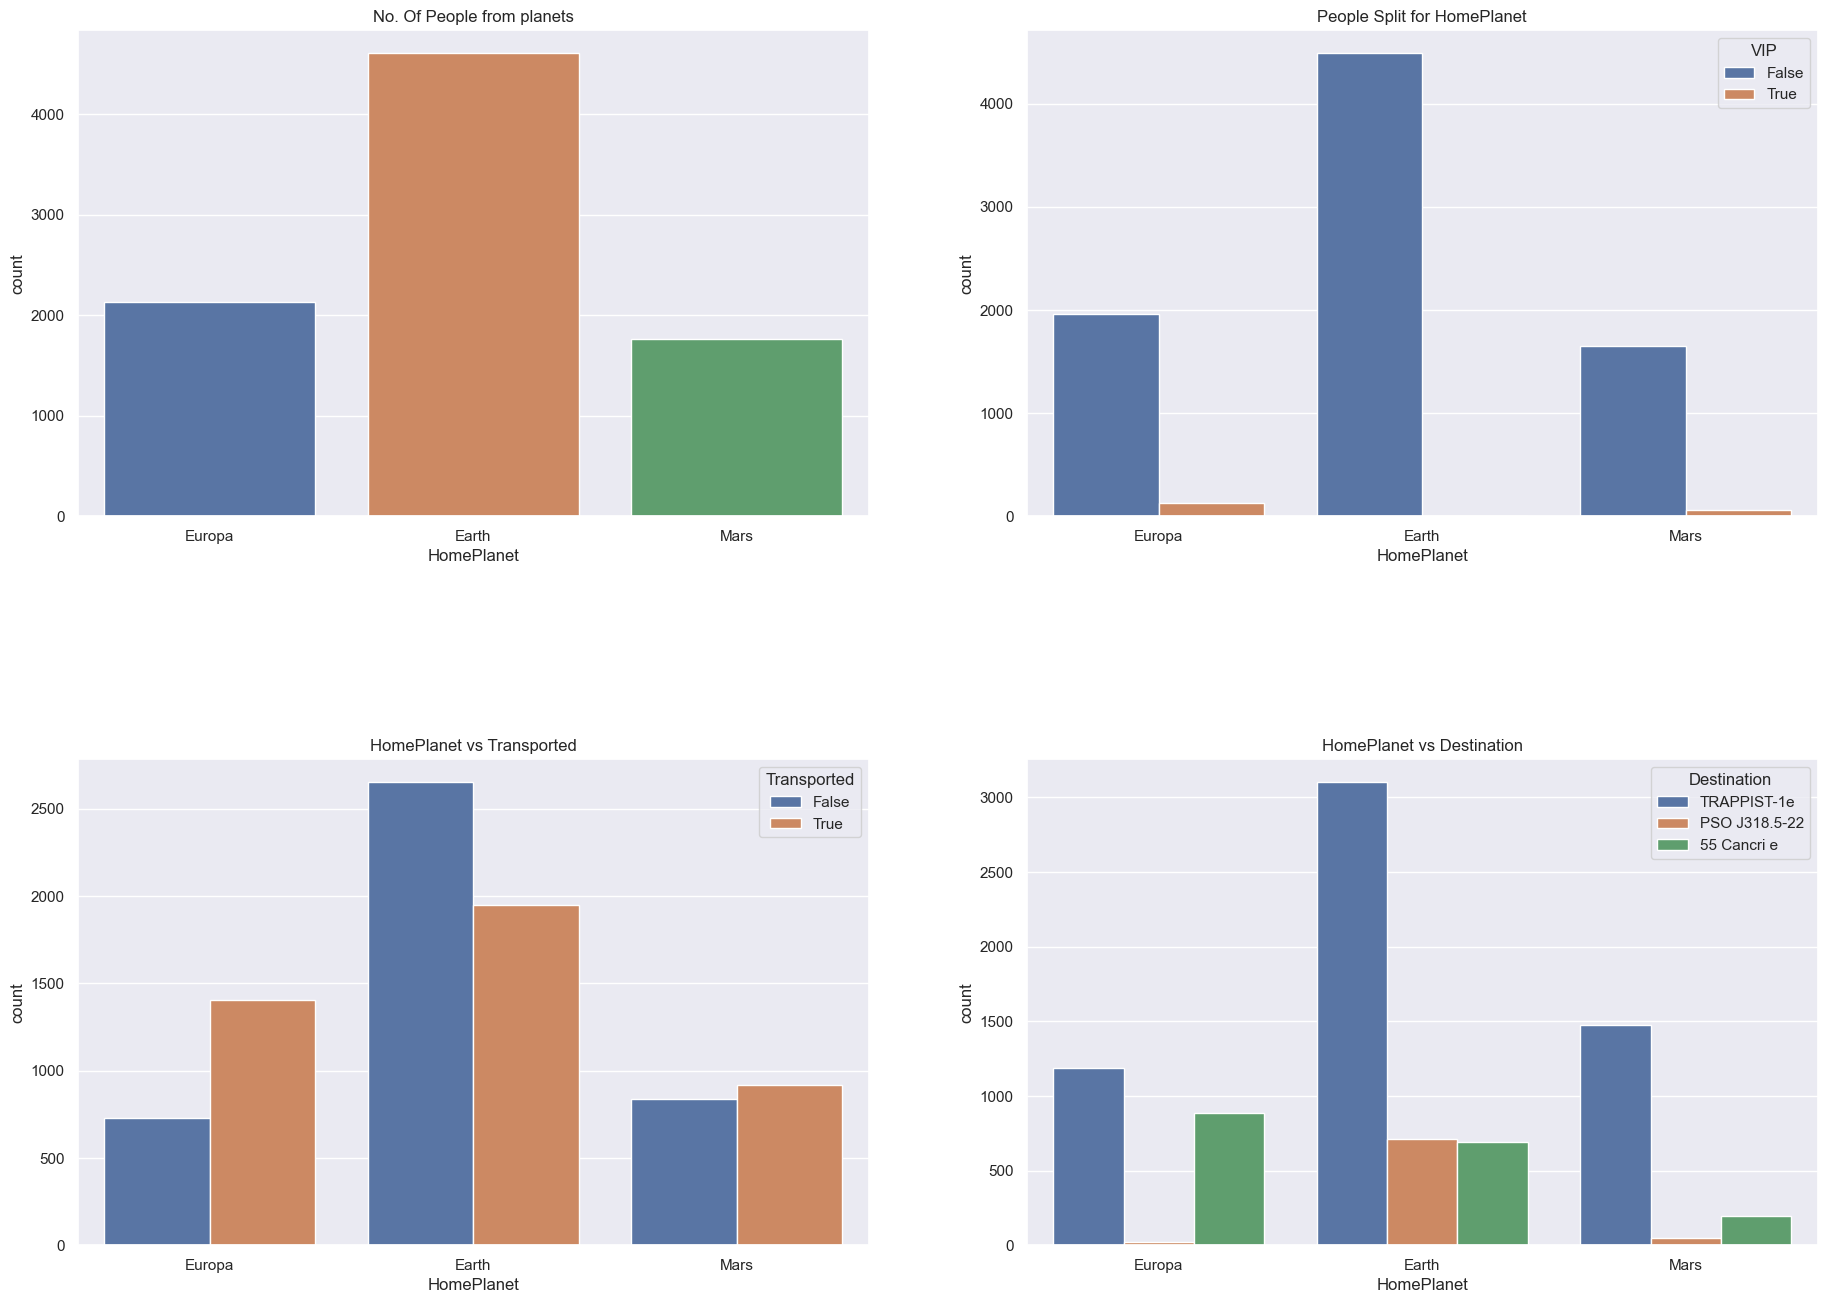

In [91]:
f,ax=plt.subplots(2,2,figsize=(20,15))
sns.countplot(x='HomePlanet',data=data,ax=ax[0,0])
ax[0,0].set_title('No. Of People from planets')
sns.countplot(x='HomePlanet',hue='VIP',data=data,ax=ax[0,1])
ax[0,1].set_title('People Split for HomePlanet')
sns.countplot(x='HomePlanet',hue='Transported',data=data,ax=ax[1,0])
ax[1,0].set_title('HomePlanet vs Transported')
sns.countplot(x='HomePlanet',hue='Destination',data=data,ax=ax[1,1])
ax[1,1].set_title('HomePlanet vs Destination')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

# Filling NaN values

In [92]:
data['HomePlanet'].fillna('Earth',inplace=True)

In [93]:
data.HomePlanet.isnull().sum()

0

In [94]:
data['VIP'].fillna(True,inplace=True)

In [95]:
data.VIP.isnull().sum()

0

In [96]:
data['Destination'].fillna('TRAPPIST-1e',inplace=True)

In [97]:
data.Destination.isnull().sum()

0

In [98]:
grouping=data.groupby("HomePlanet")["Age"]

data["Age"].fillna(grouping.transform("mean"),inplace=True)

In [99]:
data.Age.isnull().sum()

0

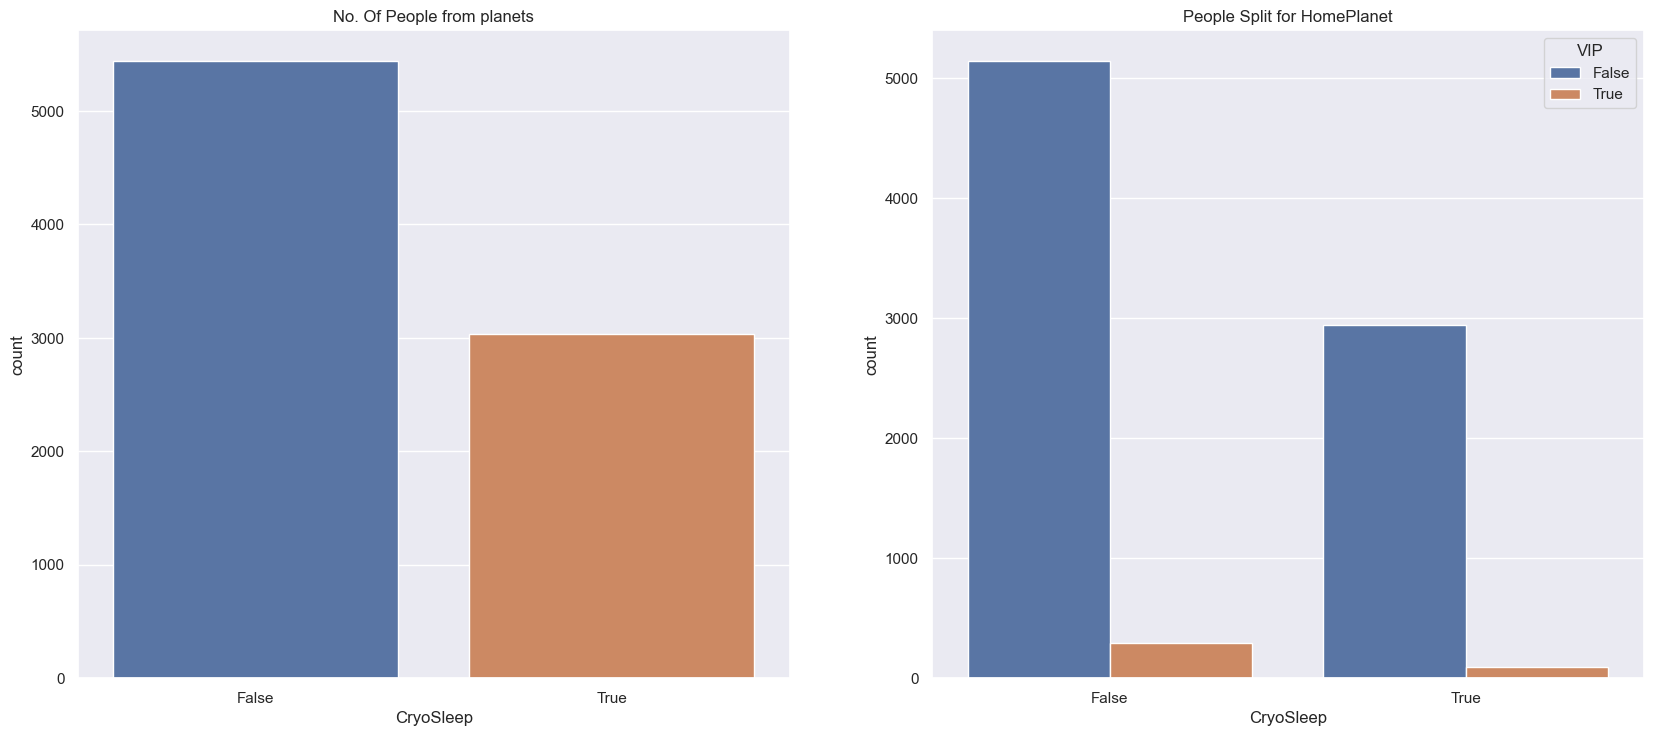

In [100]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.countplot(x='CryoSleep',data=data,ax=ax[0])
ax[0].set_title('No. Of People from planets')
sns.countplot(x='CryoSleep',hue='VIP',data=data,ax=ax[1])
ax[1].set_title('People Split for HomePlanet')
plt.show()

In [101]:
p1=data[data['VIP']==True]['CryoSleep'].value_counts()
p2=data[data['VIP']==False]['CryoSleep'].value_counts()
    
cryoSleep = pd.DataFrame([p1,p2])
cryoSleep.index = ['VIP_True','VIP_False']
cryoSleep.head()

,False,True
VIP_True,296,96
VIP_False,5143,2941


<Axes: >

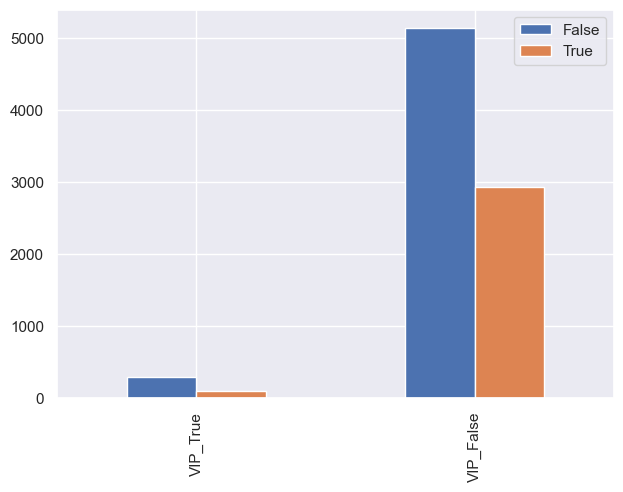

In [102]:
cryoSleep.plot(kind='bar')

In [103]:
data['CryoSleep'].fillna(False,inplace=True)

data.CryoSleep.isnull().sum()

0

In [104]:
 data['Cabin']=data['Cabin'].str[:1]

p1=data[data['HomePlanet']=='Earth']['Cabin'].value_counts()
p2=data[data['HomePlanet']=='Europa']['Cabin'].value_counts()
p3=data[data['HomePlanet']=='Mars']['Cabin'].value_counts()
    
cabins = pd.DataFrame([p1,p2,p3])
cabins.index = ['1','2','3']
cabins.head()

,G,F,E,C,B,D,A,T
1,2559.0,1684.0,418.0,13.0,13.0,10.0,4.0,1.0
2,NaN,NaN,128.0,734.0,766.0,186.0,252.0,4.0
3,NaN,1110.0,330.0,NaN,NaN,282.0,NaN,NaN


<Axes: >

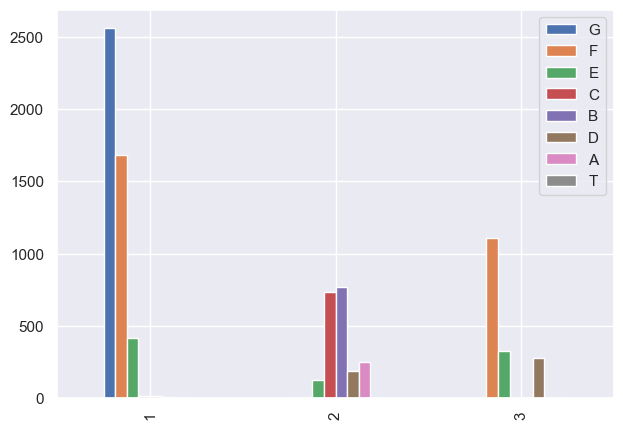

In [105]:
cabins.plot(kind='bar')

In [106]:
cabin_mapping= {"A":0,"B":0.5,"C":1,"D":1.5,"E":2,"F":2.5,"G":3,"T":3.5}

data['Cabin']=data['Cabin'].map(cabin_mapping)

In [107]:
grouping_home = data.groupby("HomePlanet")["Cabin"]

data['Cabin'].fillna(grouping_home.transform("median"),inplace=True)

data.Cabin.isnull().sum()

0

# Feature Engineering

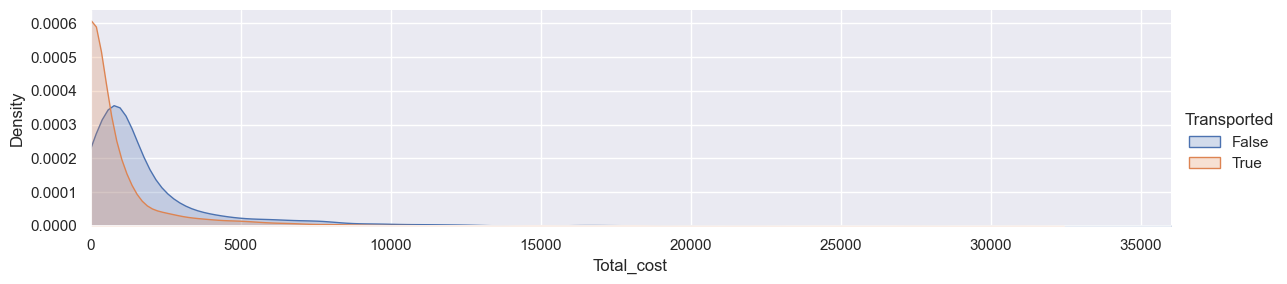

In [108]:
data['Total_cost']=0
data['Total_cost']=data['RoomService']+data['FoodCourt']+data['ShoppingMall']+data['Spa']+data['VRDeck']

facet=sns.FacetGrid(data, hue='Transported', aspect=4)
facet.map(sns.kdeplot,'Total_cost',shade=True)
facet.set(xlim=(0,data['Total_cost'].max()))
facet.add_legend()

plt.show()

In [109]:
data.Total_cost.max()

35987.0

# Converting String Values into Numeric

In [110]:
data['Age_band']=0
data.loc[data['Age']<=16,'Age_band']=0
data.loc[(data['Age']>16)&(data['Age']<=32),'Age_band']=1
data.loc[(data['Age']>32)&(data['Age']<=48),'Age_band']=2
data.loc[(data['Age']>48)&(data['Age']<=64),'Age_band']=3
data.loc[data['Age']>64,'Age_band']=4
data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Total_cost,Age_band
0,0001_01,Europa,False,0.5,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0.0,2
1,0002_01,Earth,False,2.5,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,736.0,1
2,0003_01,Europa,False,0.0,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,10383.0,3
3,0003_02,Europa,False,0.0,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,5176.0,2
4,0004_01,Earth,False,2.5,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1091.0,0


In [111]:
data['Total_Cost']=0
data.loc[data['Total_cost']<=3600,'Total_Cost']=0
data.loc[(data['Total_cost']>3600)&(data['Total_cost']<=7200),'Total_Cost']=0.5
data.loc[(data['Total_cost']>7200)&(data['Total_cost']<=10800),'Total_Cost']=1
data.loc[(data['Total_cost']>10800)&(data['Total_cost']<=14400),'Total_Cost']=1.5
data.loc[(data['Total_cost']>14400)&(data['Total_cost']<=18000),'Total_Cost']=2
data.loc[(data['Total_cost']>18000)&(data['Total_cost']<=21600),'Total_Cost']=2.5
data.loc[(data['Total_cost']>21600)&(data['Total_cost']<=25200),'Total_Cost']=3
data.loc[(data['Total_cost']>25200)&(data['Total_cost']<=28800),'Total_Cost']=3.5
data.loc[(data['Total_cost']>28800)&(data['Total_cost']<=32400),'Total_Cost']=4
data.loc[data['Total_cost']>32400,'Total_Cost']=4.5

data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Total_cost,Age_band,Total_Cost
0,0001_01,Europa,False,0.5,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0.0,2,0.0
1,0002_01,Earth,False,2.5,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,736.0,1,0.0
2,0003_01,Europa,False,0.0,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,10383.0,3,1.0
3,0003_02,Europa,False,0.0,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,5176.0,2,0.5
4,0004_01,Earth,False,2.5,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1091.0,0,0.0


In [112]:
home_mapping= {"Earth":0,"Europa":1,"Mars":2}

data['HomePlanet']=data['HomePlanet'].map(home_mapping)

In [113]:
des_mapping= {"TRAPPIST-1e":0,"55 Cancri e":1,"PSO J318.5-22":2}

data['Destination']=data['Destination'].map(des_mapping)

# Data Cleaning

In [114]:
data.drop(['PassengerId','Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Name','Total_cost'],axis=1,inplace=True)

In [115]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   HomePlanet   8693 non-null   int64  
 1   CryoSleep    8693 non-null   bool   
 2   Cabin        8693 non-null   float64
 3   Destination  8693 non-null   int64  
 4   VIP          8693 non-null   bool   
 5   Transported  8693 non-null   bool   
 6   Age_band     8693 non-null   int64  
 7   Total_Cost   8693 non-null   float64
dtypes: bool(3), float64(2), int64(3)
memory usage: 365.2 KB


# Predictive Modeling

In [116]:
target=data.Transported
data.drop('Transported',axis=1,inplace=True)

In [117]:
k_fold=KFold(n_splits=10,shuffle=True,random_state=0)

In [118]:
clf_dt=DecisionTreeClassifier()
score=cross_val_score(clf_dt,data,target,cv=k_fold,scoring='accuracy')
score

array([0.72413793, 0.73448276, 0.72643678, 0.69965478, 0.69275029,
       0.73072497, 0.71921749, 0.716916  , 0.72727273, 0.73072497])

In [119]:
np.mean(score)*100

72.02318691057233

In [120]:
clf_dt=RandomForestClassifier()
score=cross_val_score(clf_dt,data,target,cv=k_fold,scoring='accuracy')
score

array([0.71954023, 0.73333333, 0.73218391, 0.70886076, 0.68699655,
       0.72957422, 0.72151899, 0.7146145 , 0.72957422, 0.72727273])

In [121]:
np.mean(score)*100

72.03469439043424